# Max out of ABS 

In [ ]:
import laspy
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


In [ ]:
file_path = "/mnt/c/Users/Kilian/Documents/LeafH2O/measurements/250522/01_ABS/ABS_10m_Ahorn_klein_IR.las"
las = laspy.read(file_path)
intensity = np.array(las.Intensity_corr)  # Convert to NumPy array

# Define a Gaussian function
def gaussian(x, amp, mu, sigma):
    return amp * np.exp(-(x - mu)**2 / (2 * sigma**2))

# Compute histogram
counts, bin_edges = np.histogram(intensity, bins=50)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Initial guess for parameters: amplitude, mean, stddev
init_guess = [counts.max(), bin_centers[np.argmax(counts)], np.std(intensity)]

# Fit the Gaussian
popt, pcov = curve_fit(gaussian, bin_centers, counts, p0=init_guess)

# popt contains the best fit parameters: amplitude, mean, stddev


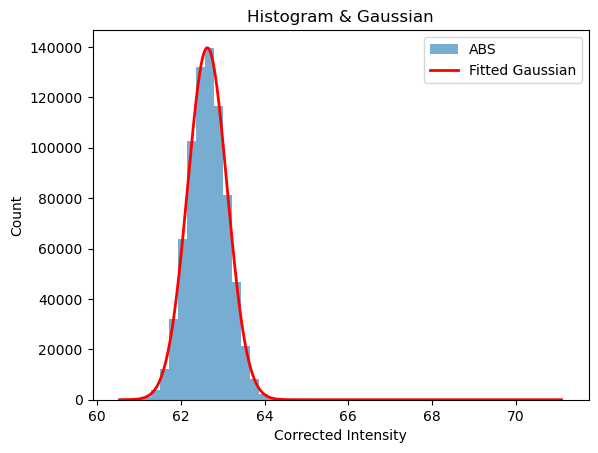

In [21]:
# Plot the histogram of the data
plt.hist(intensity, bins=50, alpha=0.6, label='ABS')

# add the fitted Gaussian curve
x_fit = np.linspace(bin_centers.min(), bin_centers.max(), 500)
y_fit = gaussian(x_fit, *popt)
plt.plot(x_fit, y_fit, color='red', linewidth=2, label='Fitted Gaussian')

plt.xlabel('Corrected Intensity')
plt.ylabel('Count')
plt.legend()
plt.title('Histogram & Gaussian')
plt.show()

In [ ]:
# get the max of the gaussian function
x_max = x_fit[np.argmax(y_fit)]

np.float64(62.63353047648031)